In [1]:
import pandas as pd
import numpy as np

In [73]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [33]:
# print 없이 모든값 출력
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

# 서울시 코로나19 확진자 발생동향 데이터
* 서울시 열린데이터 광장

In [6]:
df = pd.read_csv('./data1/서울시 코로나19 확진자 현황.csv', low_memory=False)
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y


In [5]:
df.shape

(99550, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      99550 non-null  int64  
 1   확진일     99550 non-null  object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      99550 non-null  object 
 6   여행력     1717 non-null   object 
 7   접촉력     99550 non-null  object 
 8   조치사항    0 non-null      float64
 9   상태      99550 non-null  object 
 10  이동경로    10000 non-null  object 
 11  등록일     99550 non-null  object 
 12  수정일     99550 non-null  object 
 13  노출여부    99550 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 10.6+ MB


## 데이터 확인 및 전처리

In [10]:
# 불필요한 컬럼 삭제
df.drop(columns=['환자번호','국적','환자정보','조치사항',
                 '이동경로','등록일','수정일','노출여부'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      99550 non-null  int64 
 1   확진일     99550 non-null  object
 2   지역      99550 non-null  object
 3   여행력     1717 non-null   object
 4   접촉력     99550 non-null  object
 5   상태      99550 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [12]:
# 확진일 -> datetime으로 타입 변경
df['확진일'] = pd.to_datetime(df['확진일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  object        
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.6+ MB


In [36]:
# 지역 25개 구

len(df['지역'].unique())
df['지역'].nunique()

df['지역'].unique()

27

27

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구'],
      dtype=object)

In [35]:
df['지역'] = df['지역'].str.strip() # 공백 제거
df['지역'].nunique()
df['지역'].unique()

27

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구'],
      dtype=object)

In [39]:
df['지역'] = df['지역'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


In [41]:
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

## 구별 확진자 동향
* 확진일 - 구별로 pivot_table 집계

In [42]:
df.head()

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-


In [53]:
df_gu = pd.pivot_table(df, index='확진일', columns ='지역', values='연번',
                      aggfunc='count', margins=True)
# df_gu = pd.pivot_table(df, '연번', '확진일', '지역','count')
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [70]:
# 서울시 일별 추가 확진자 동향
s_date = df_gu['All'][:-1]
s_date

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-09-24    1222
2021-09-25     928
2021-09-26     778
2021-09-27     842
2021-09-28    1054
Name: All, Length: 582, dtype: int64

In [71]:
# 서울시 일별 추가확진자 많은 순으로 
s_date.sort_values(ascending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

In [156]:
s_date3 = df_gu[['All']][:-1]
s_date3

지역,All
확진일,
2020-01-24,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2
...,...
2021-09-24,1222
2021-09-25,928
2021-09-26,778


In [157]:
s_date3.sort_values(by='All', ascending=False)

지역,All
확진일,
2021-09-24,1222
2021-09-28,1054
2021-09-25,928
2021-09-23,905
2021-09-27,842
...,...
2020-04-24,1
2020-04-30,1
2020-05-01,1


## 서울시 일별 추가 확진자 시각화


Text(0.5, 1.0, '서울시 일별 확진자 시각화')

Text(0.5, 0, '확진일')

Text(0, 0.5, '확진자수')

(array([18262., 18322., 18383., 18444., 18506., 18567., 18628., 18687.,
        18748., 18809., 18871.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07'),
  Text(18506.0, 0, '2020-09'),
  Text(18567.0, 0, '2020-11'),
  Text(18628.0, 0, '2021-01'),
  Text(18687.0, 0, '2021-03'),
  Text(18748.0, 0, '2021-05'),
  Text(18809.0, 0, '2021-07'),
  Text(18871.0, 0, '2021-09')])

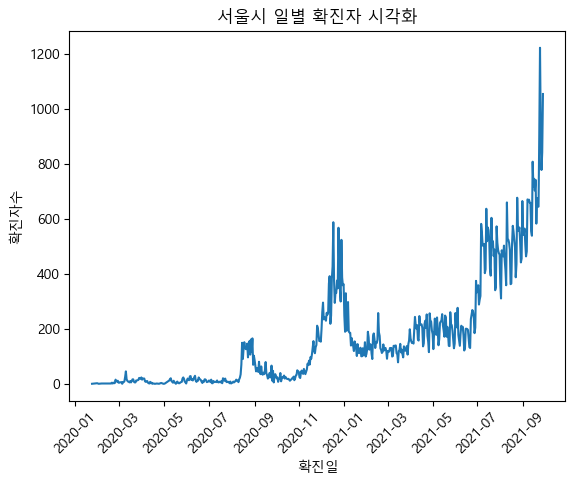

In [78]:
x = s_date.index
y = s_date.values
plt.plot(x,y)
plt.title("서울시 일별 확진자 시각화")
plt.xlabel('확진일')
plt.ylabel('확진자수')
plt.xticks(rotation=45)
plt.show()

In [80]:
# 서울시 구별 누적 확진자 비교
s_gu = df_gu.loc['All'][:-1]
s_gu = s_gu.sort_values(ascending=False)
s_gu

지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64

In [167]:
s_gu3 = df_gu.loc[['All']]
s_gu3.drop(columns='All', axis=1, inplace=True)
s_gu3 = s_gu3.sort_values(by='All',axis=1,ascending=False)
s_gu3

지역,강남구,송파구,관악구,타시도,영등포구,강서구,은평구,서초구,구로구,동작구,...,양천구,성동구,용산구,서대문구,강북구,도봉구,기타,금천구,중구,종로구
확진일,,,,,,,,,,,,,,,,,,,,,
All,6926,6356,5418,4715,4463,4447,4284,4284,4168,4120,...,3291,2839,2705,2692,2606,2605,2321,2064,1708,1617


<Figure size 500x400 with 0 Axes>

<BarContainer object of 27 artists>

Text(0.5, 1.0, '2021-09-28 구별 누적확진자수')

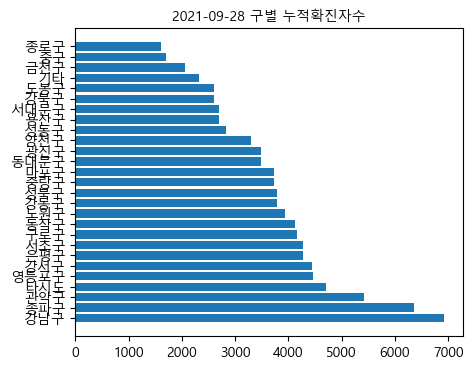

In [105]:
# 서울시 구별 누적확진자 많은 순 시각화
x = s_gu.index
y = s_gu.values
plt.figure(figsize=(5,4))s
plt.barh(x,y)
plt.title('서울시 구별 누적확진자수', size=10)
plt.show()

In [98]:
s_gu1 = df_gu.iloc[-2][:-1]
s_gu1 = s_gu1.sort_values(ascending=False)
s_gu1

지역
송파구     68
동대문구    66
기타      65
구로구     55
강동구     51
관악구     48
마포구     47
은평구     47
강남구     45
타시도     43
영등포구    43
성북구     41
강서구     41
중구      37
광진구     36
도봉구     35
금천구     31
서대문구    30
노원구     29
동작구     28
양천구     27
중랑구     26
강북구     25
성동구     24
용산구     24
종로구     23
서초구     19
Name: 2021-09-28 00:00:00, dtype: int64

<Figure size 500x400 with 0 Axes>

<BarContainer object of 27 artists>

Text(0.5, 1.0, '2021-09-28 구별 누적확진자수')

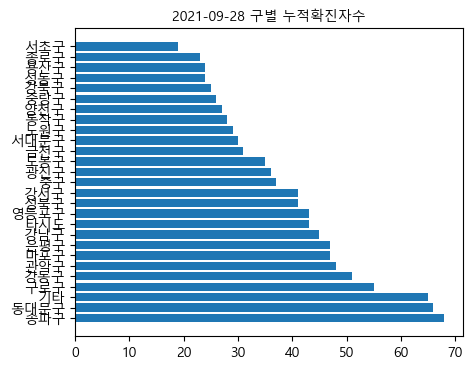

In [106]:
x = s_gu1.index
y = s_gu1.values
plt.figure(figsize=(5,4))
plt.barh(x,y) # s_gu1.plot(kind='barh')
plt.title('2021-09-28 구별 누적확진자수', size=10)
plt.show()

In [107]:
# 접촉력에 따른 확진 분석
# 접촉력에 따른 확진 건수 best10
df['접촉력'].nunique()
df['접촉력'].unique()

1096

array(['감염경로 조사중', '기타 확진자 접촉', '송파구 소재 시장 관련(?21.9.)', ..., '은평성모병원',
       '명성교회', '종로구 집단발병'], dtype=object)

In [110]:
# df.info()
df['접촉력'].value_counts()[:10].to_frame()

,접촉력
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277
강서구 교회 관련,246


In [112]:
# 최근 월(2021 - 9월달만) 접촉력에 따른 확진건수 best10
# 확진일을 연도 2021 & 9월 ['접촉력'].value_counts()[:10]
df[조건]['접촉력'].value_counts()[:10].to_frame()

In [154]:
# 조건
(df['확진일'].dt.year==2021)&(df['확진일'].dt.month==9)

0         True
1         True
2         True
3         True
4         True
         ...  
99545    False
99546    False
99547    False
99548    False
99549    False
Name: 확진일, Length: 99550, dtype: bool

In [155]:
df[(df['확진일'].dt.year==2021)&(df['확진일'].dt.month==9)]['접촉력'].value_counts()[:10].to_frame()

,접촉력
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
동대문구 소재 시장 관련,44
강서구 소재 시장 관련,44


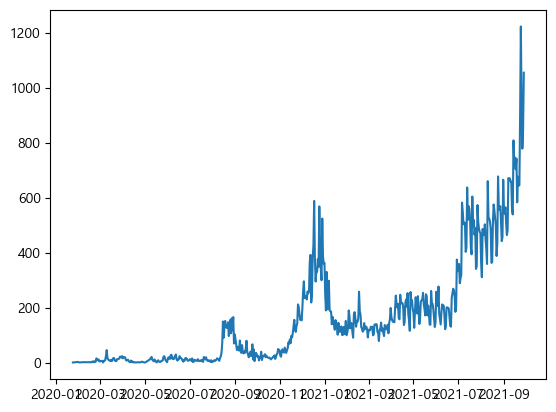

In [158]:
plt.plot(s_date3)

<Axes: ylabel='확진일'>

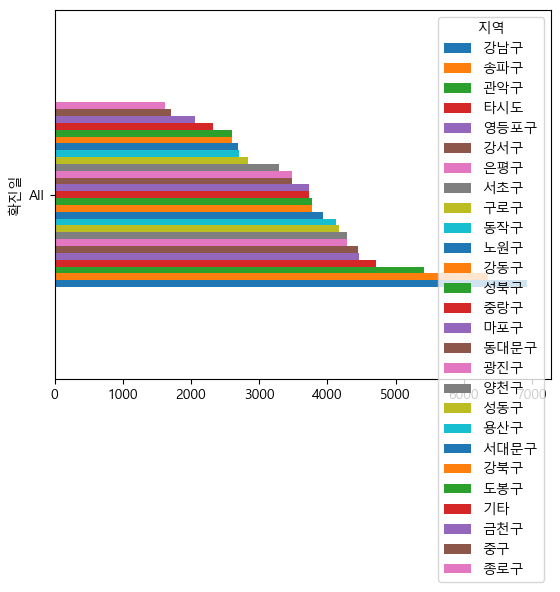

In [173]:
s_gu3.plot(kind='barh')